# 40 Single Family Homes
## 4.7 HOMES5

In [41]:
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("nortest")

require(tidyverse)
require(gridExtra)
require("nortest")

homes <- read.table("/Users/jmanderson/statistics/02_intro-to-regression/ARM by Iain - Exercises/data/homes5.csv", 
                           sep=",", header = T, stringsAsFactors = F)


The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpcJ63R7/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpcJ63R7/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpcJ63R7/downloaded_packages


In [171]:
options(repr.plot.width=15, repr.plot.height=10)
theme <- theme(
        axis.text=element_text(size = rel(2)),
        axis.title=element_text(size = rel(2)),
        plot.title=element_text(size = rel(3))
    )
points <- geom_point(size=3)

In [172]:
head(homes)

,Price,Floor,School,DHa
,<dbl>,<dbl>,<chr>,<int>
1,359.9,2.200,Redwood,0
2,249.7,1.868,Redwood,0
3,265.0,1.875,Redwood,0
4,349.0,2.000,Redwood,0
5,319.0,1.855,Harris,1
6,339.0,1.928,Redwood,0


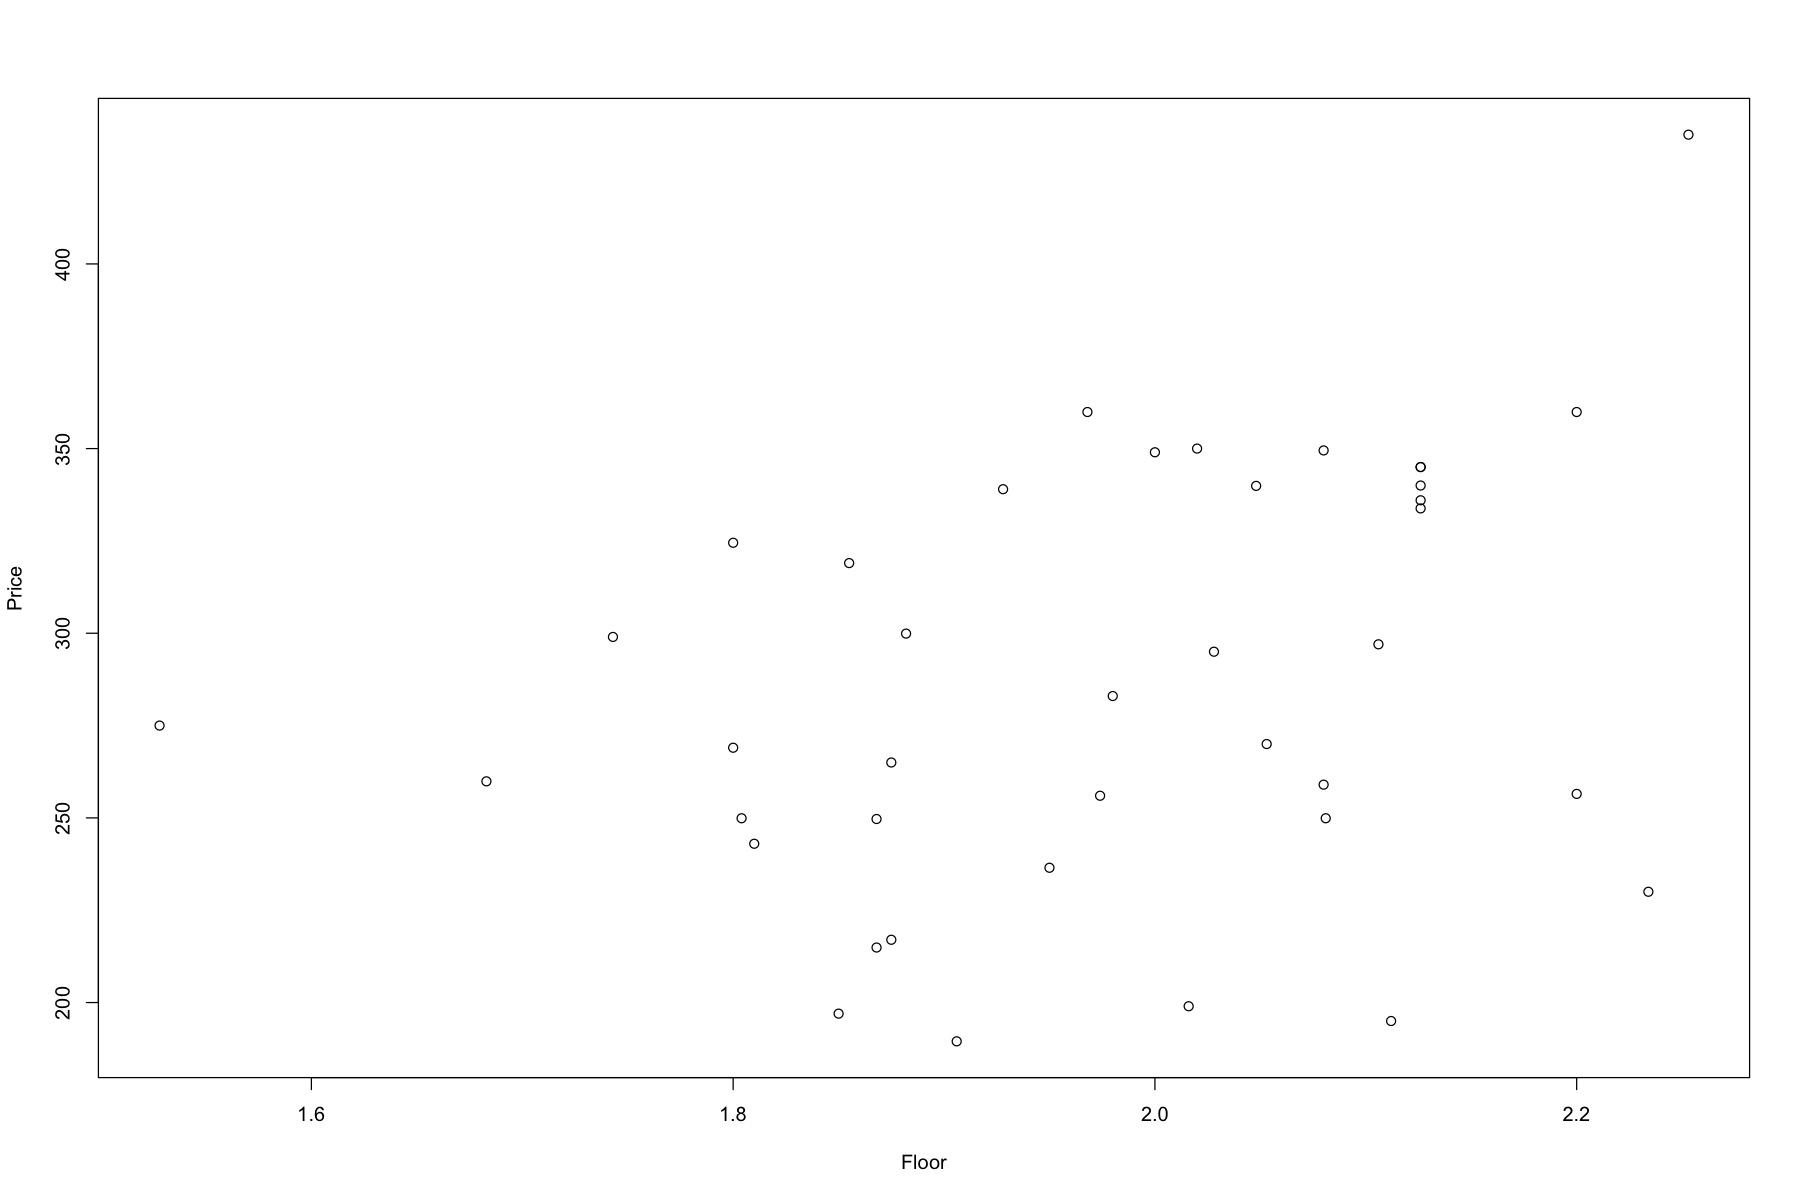

In [173]:
plot(Price~Floor, homes)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



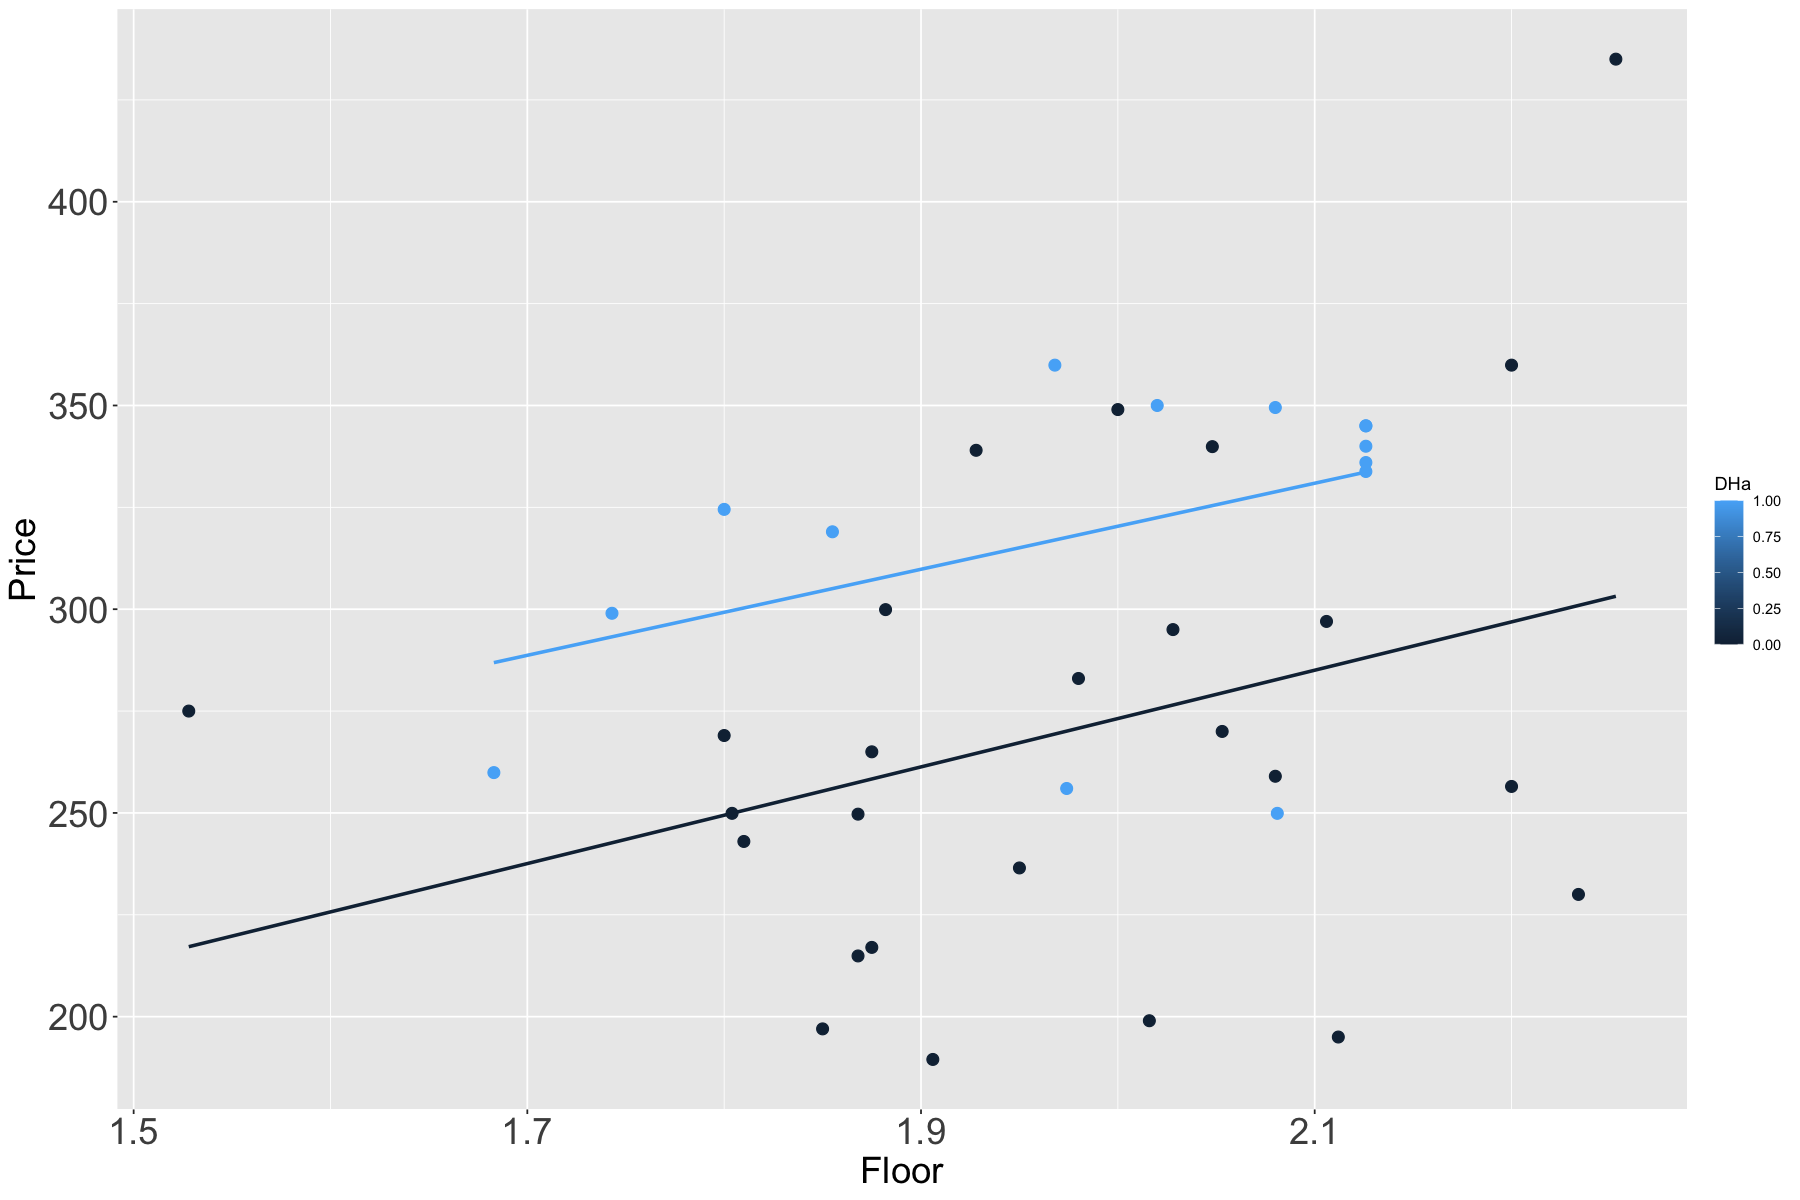

In [174]:
lmHomes <- lm(Price~DHa+Floor+DHa*Floor, homes)

predicted1 = predict(lmHomes, interval = "confidence")
fortifyHomes1 = fortify(lmHomes)
modHomes1 <- cbind(fortifyHomes1, predicted1)
    
ggplot(modHomes, aes(x=Floor, y=Price, group=DHa, fill=DHa, colour=DHa)) + 
    stat_smooth(aes(x=Floor, y=.fitted), se=FALSE) + 
    theme + points

In [175]:
summary(lmHomes)


Call:
lm(formula = Price ~ DHa + Floor + DHa * Floor, data = homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.448 -33.144   6.056  21.835 131.825 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    35.90     122.17   0.294   0.7705  
DHa            73.30     216.10   0.339   0.7364  
Floor         118.63      61.77   1.921   0.0627 .
DHa:Floor     -13.05     108.66  -0.120   0.9051  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.57 on 36 degrees of freedom
Multiple R-squared:  0.2763,	Adjusted R-squared:  0.216 
F-statistic: 4.583 on 3 and 36 DF,  p-value: 0.008102


**A P-Value of 0.91 on the Dha:Floor term confirms the visual interpretations that the slopes are the same for both neighbourhoods, therefor we can remove the interaction term.**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



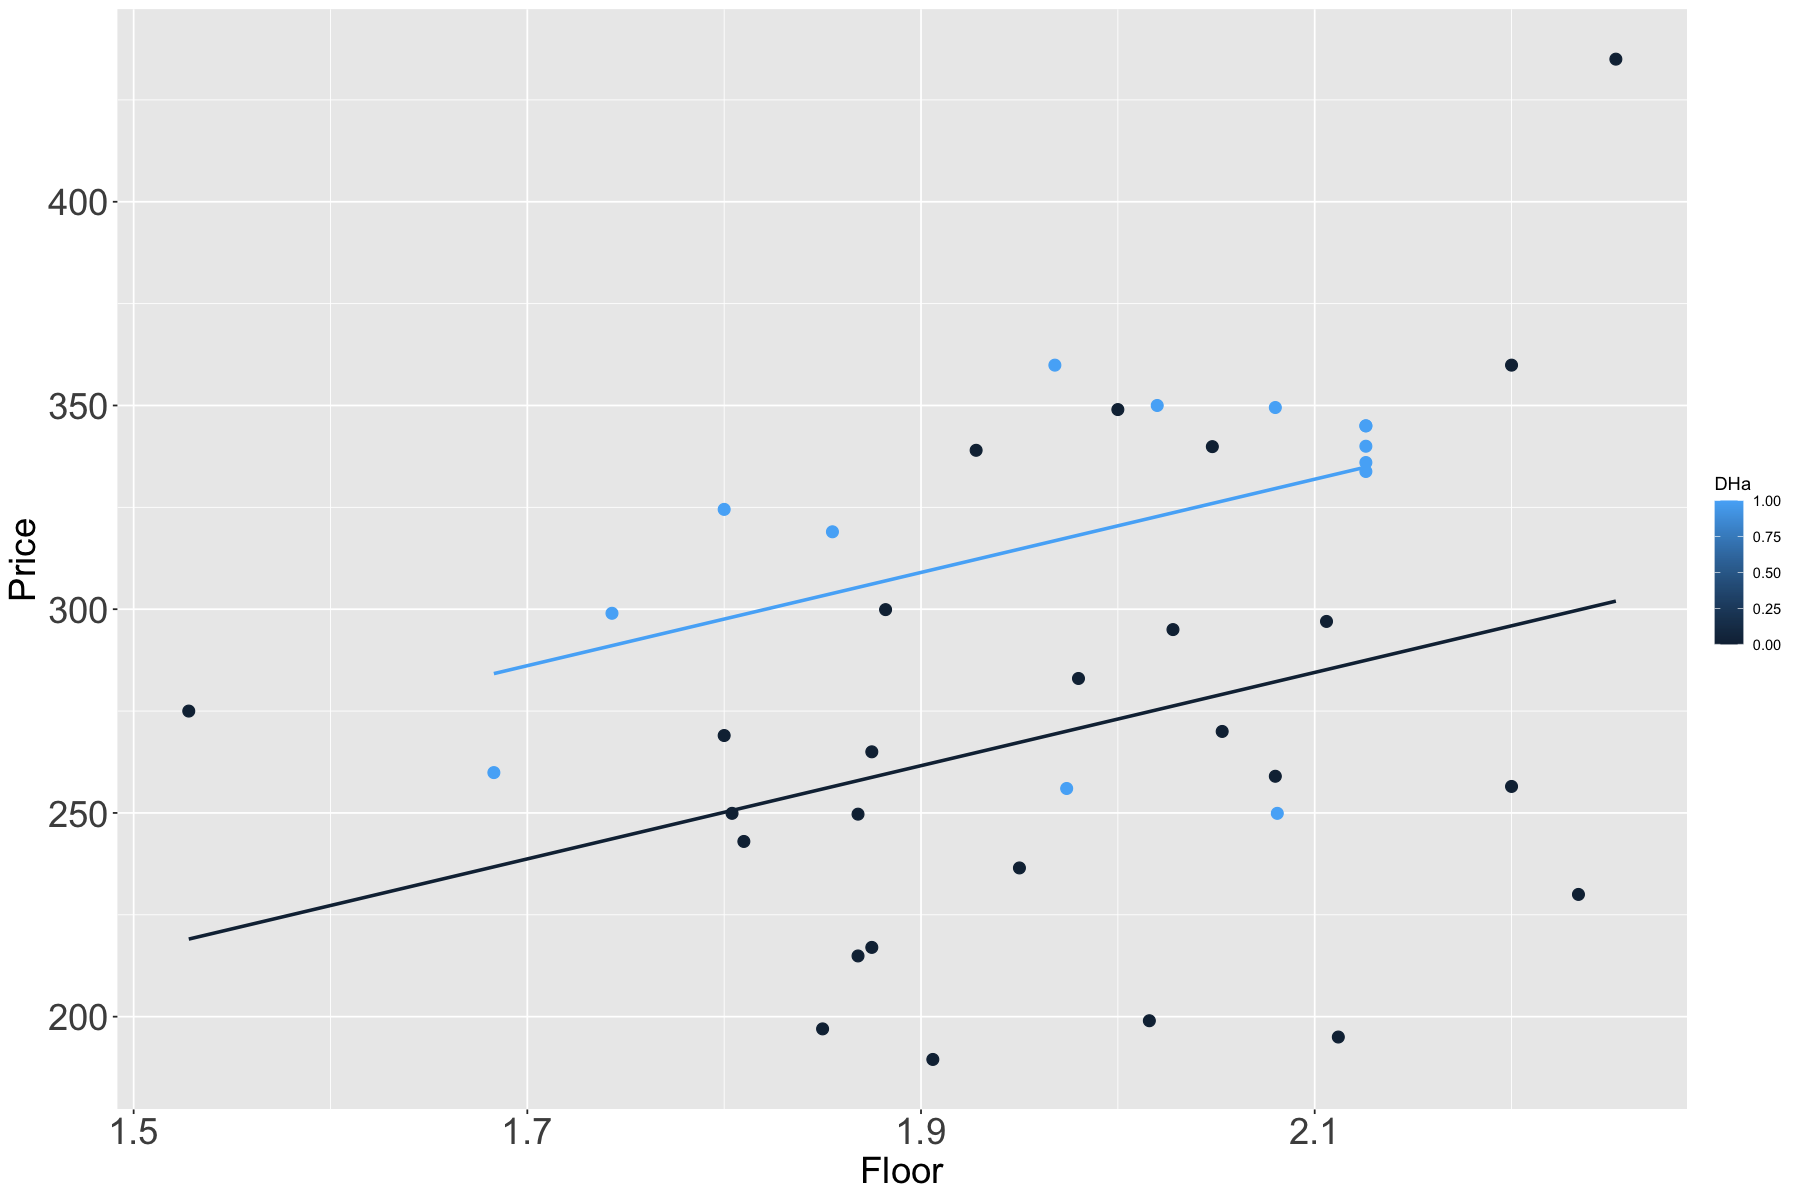

In [176]:
lmHomes2 <- lm(Price~DHa+Floor+DHa, homes)

predicted2 = predict(lmHomes2, interval = "confidence")
fortifyHomes2 = fortify(lmHomes2)
modHomes2 <- cbind(fortifyHomes2, predicted2)
    
ggplot(modHomes2, aes(x=Floor, y=Price, group=DHa, fill=DHa, colour=DHa)) + 
    stat_smooth(aes(x=Floor, y=.fitted), se=FALSE) + 
    theme + points

In [177]:
summary(lmHomes2)


Call:
lm(formula = Price ~ DHa + Floor + DHa, data = homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.855 -32.971   5.691  21.642 133.013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    44.21      99.32   0.445  0.65878   
DHa            47.42      16.56   2.863  0.00687 **
Floor         114.41      50.14   2.282  0.02833 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.9 on 37 degrees of freedom
Multiple R-squared:  0.2761,	Adjusted R-squared:  0.2369 
F-statistic: 7.055 on 2 and 37 DF,  p-value: 0.002538


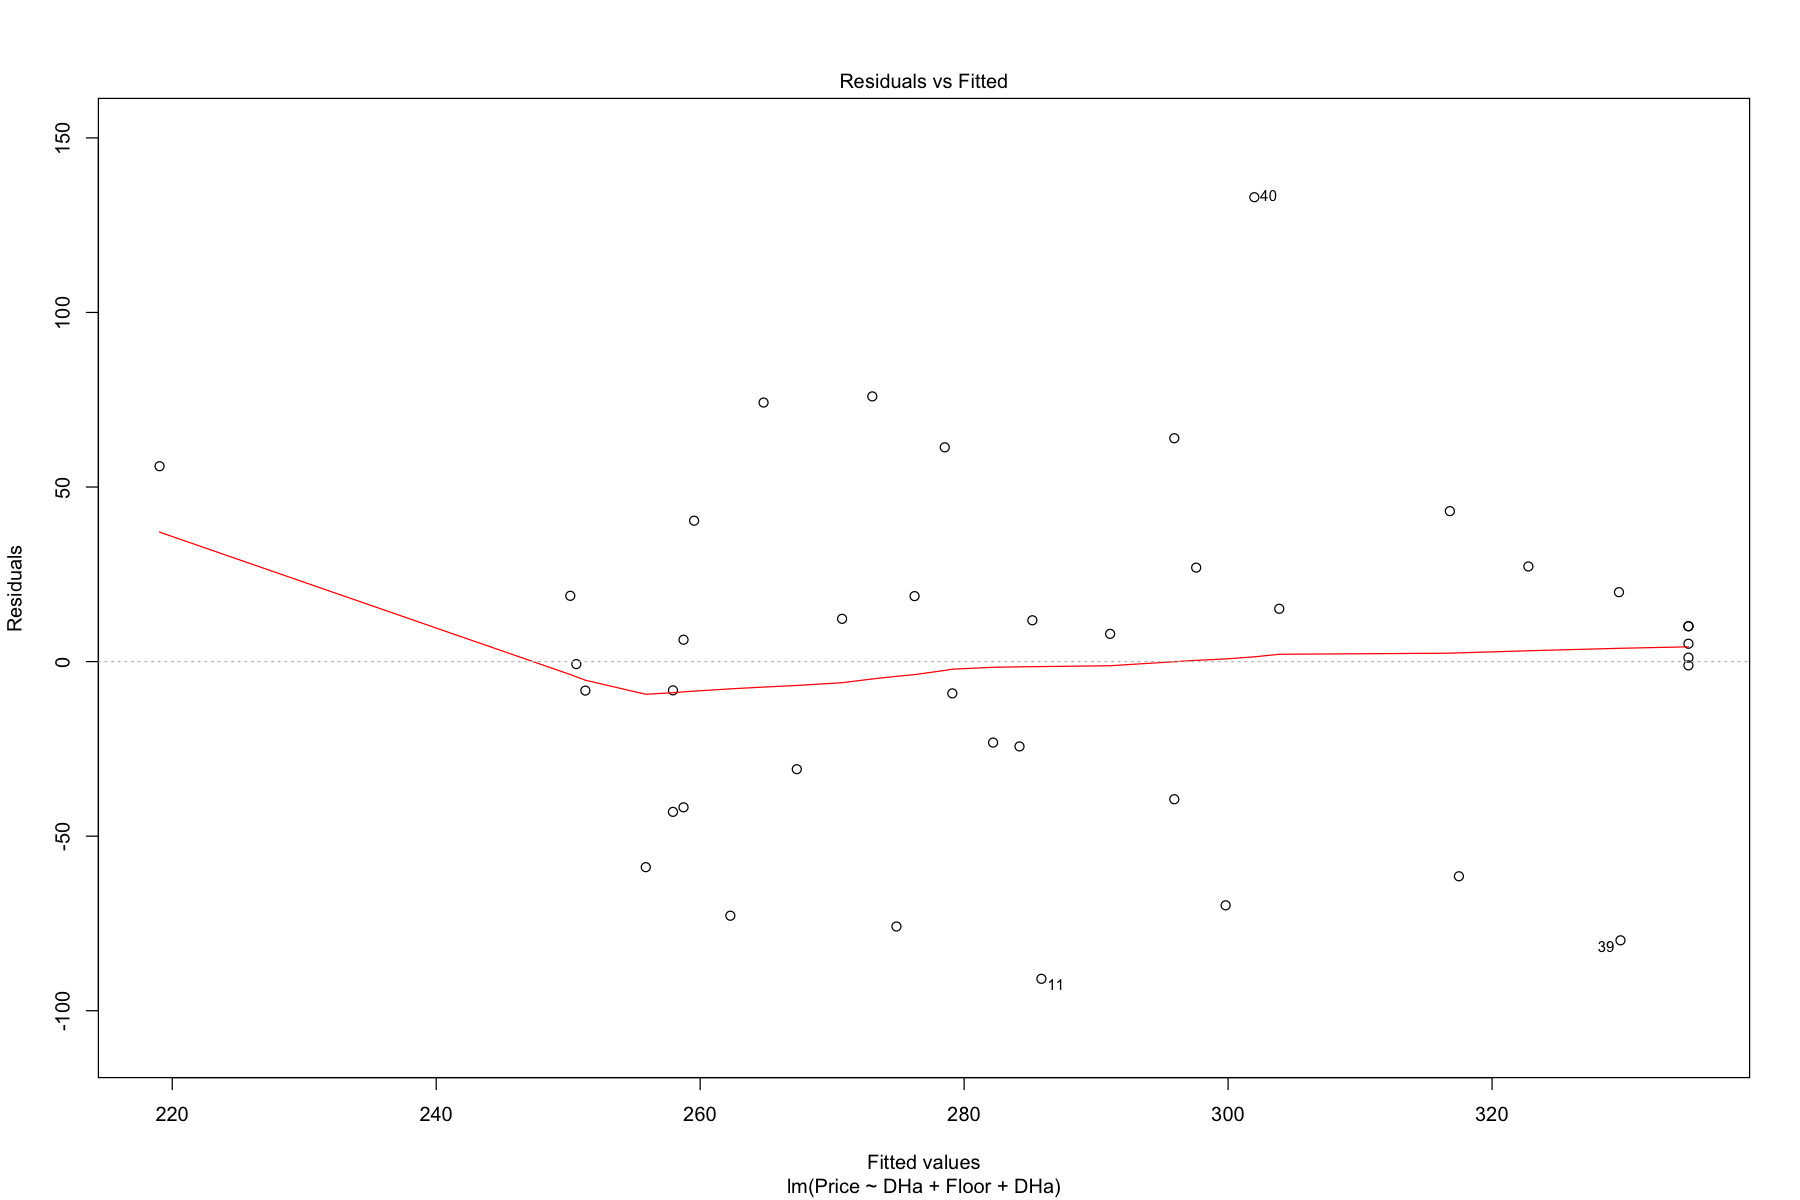

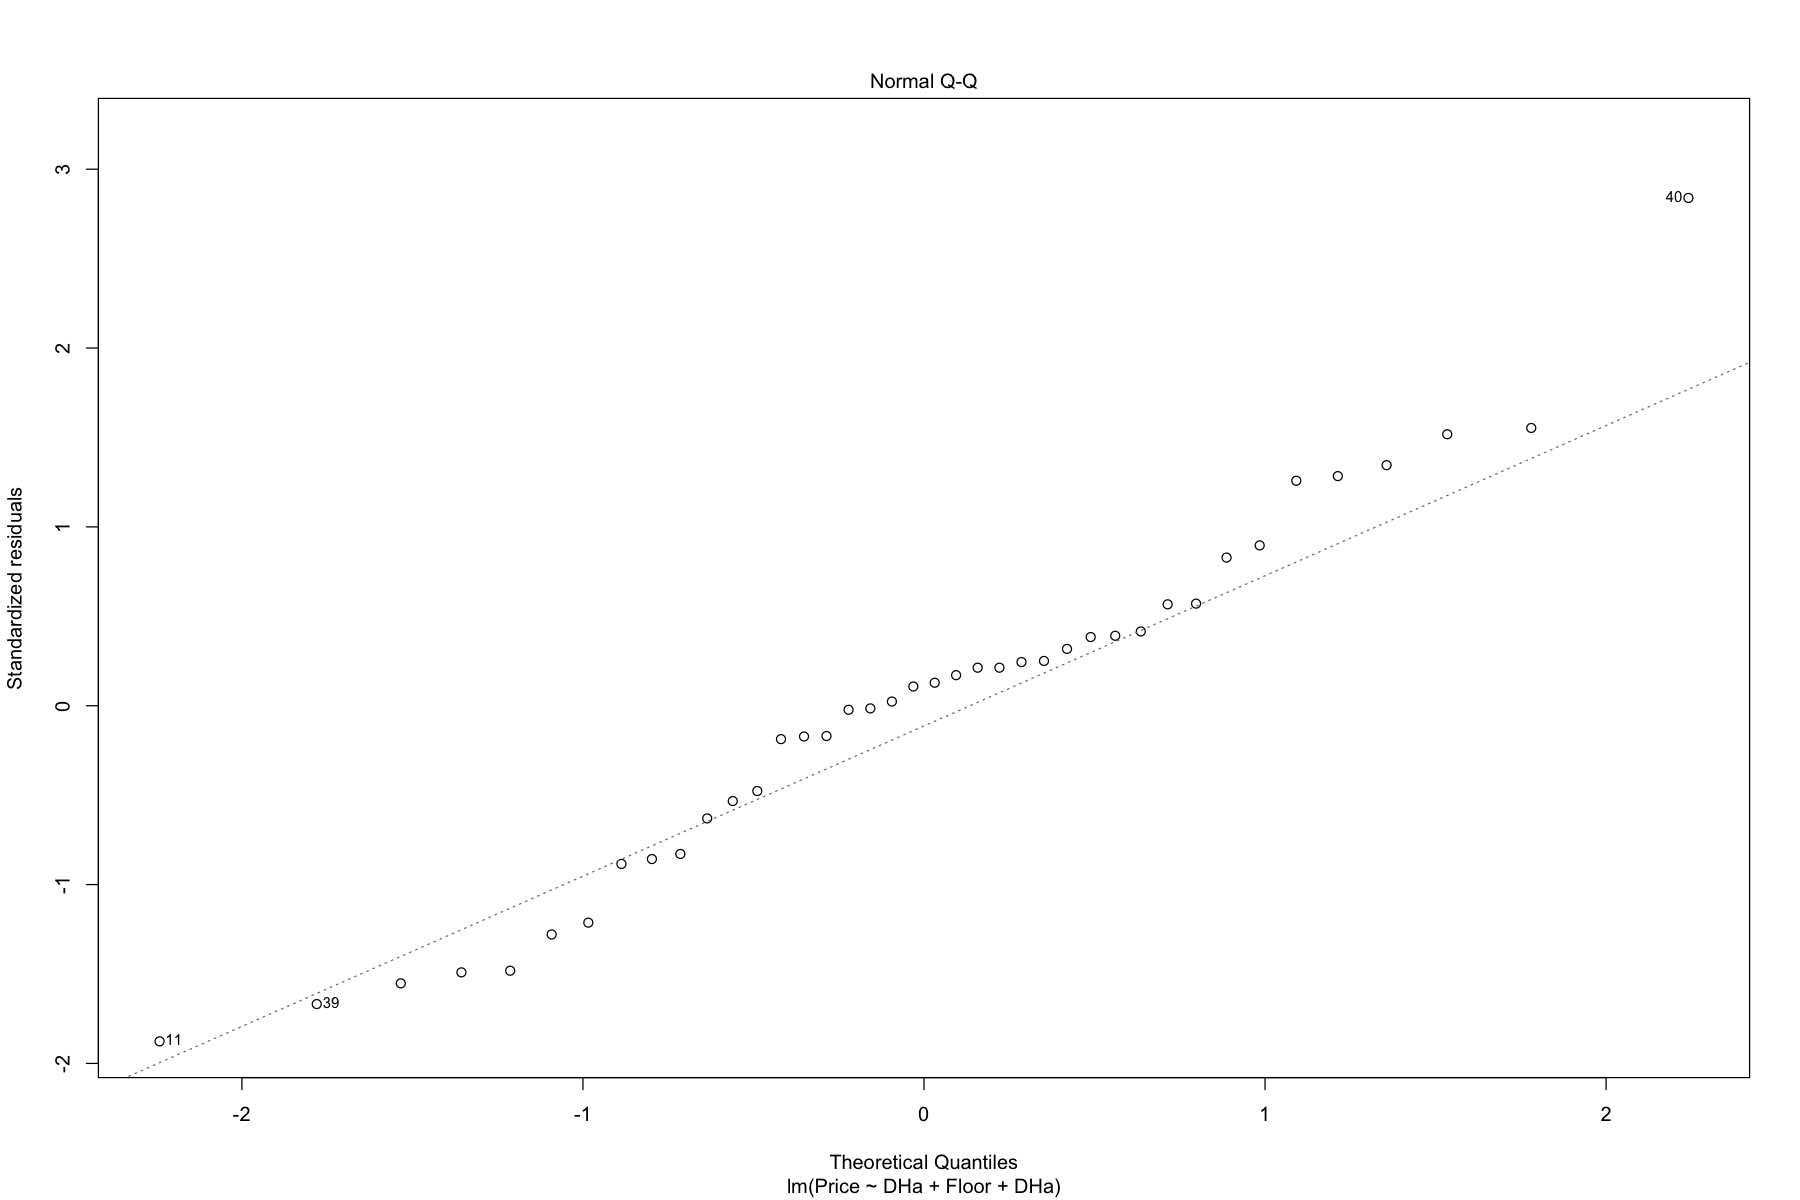

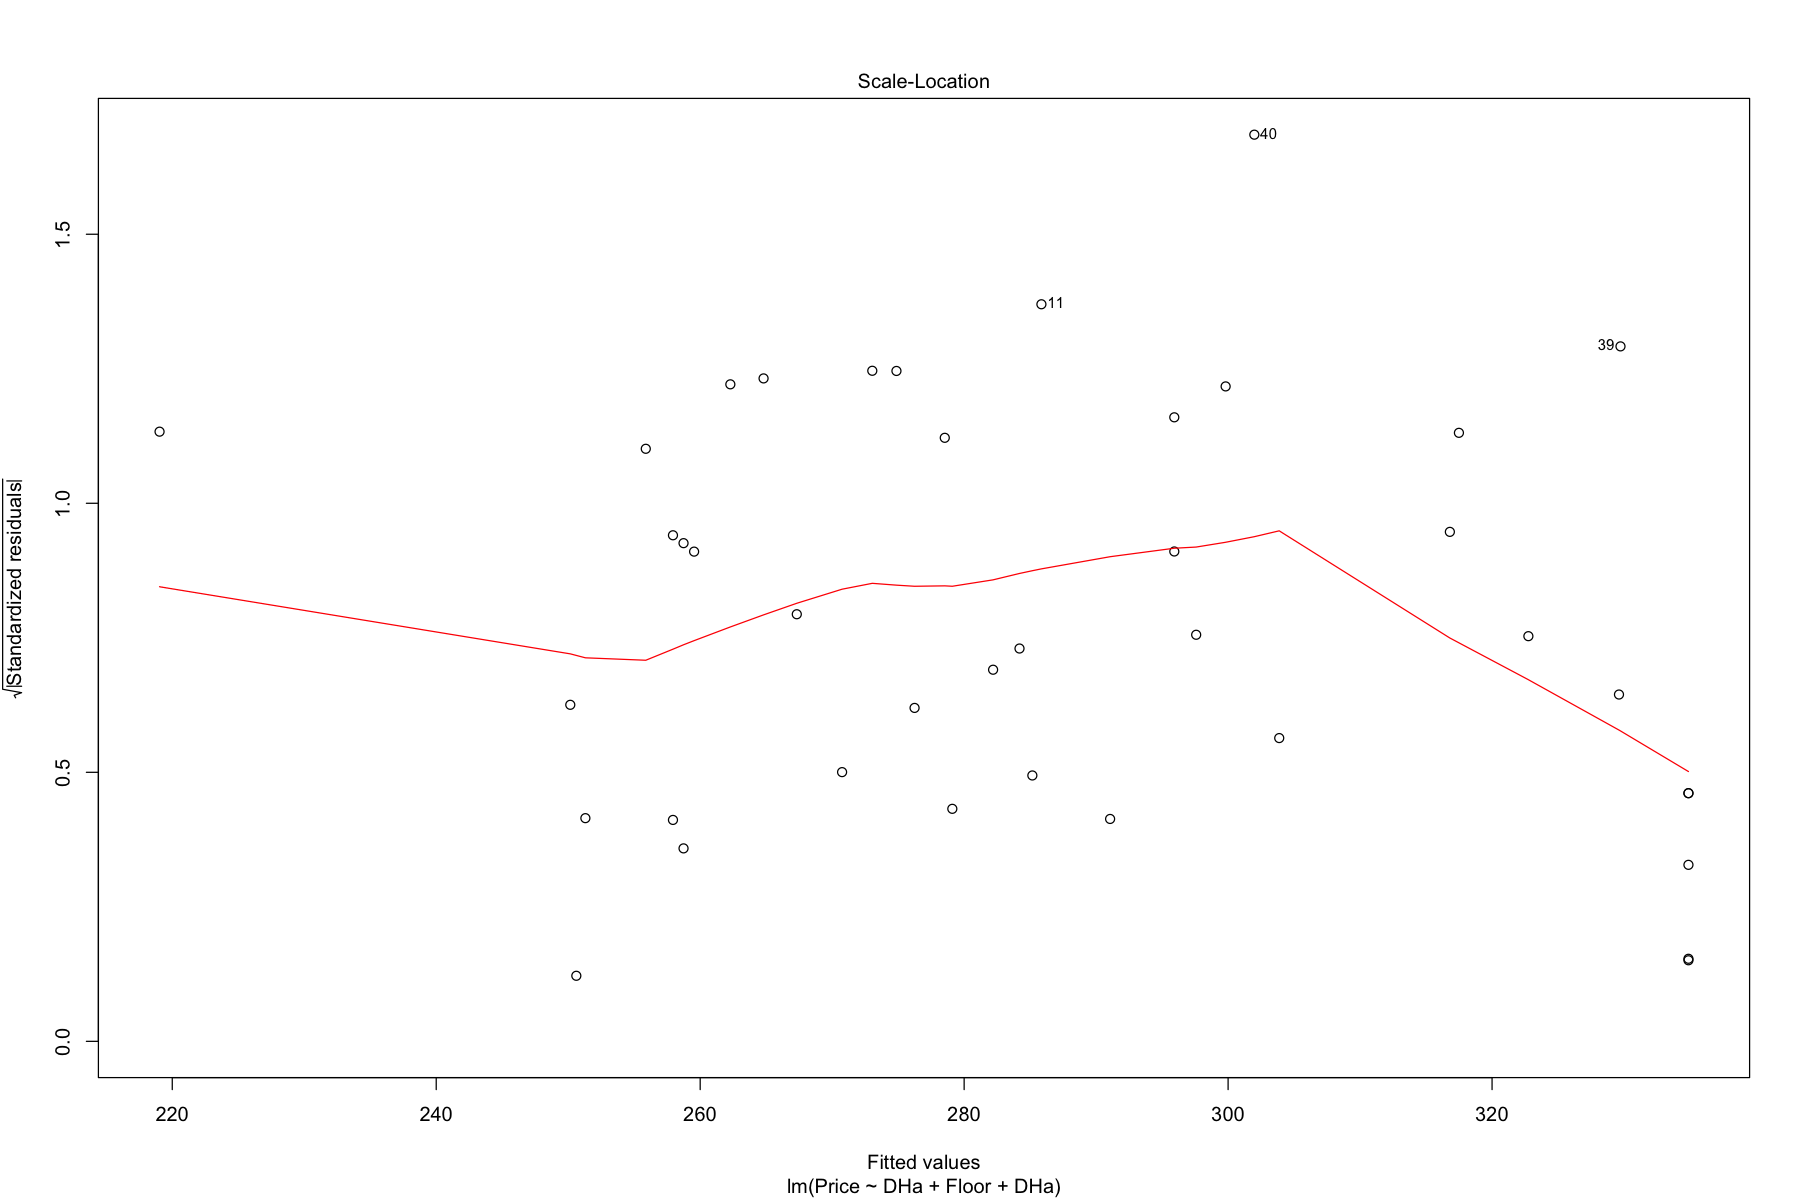

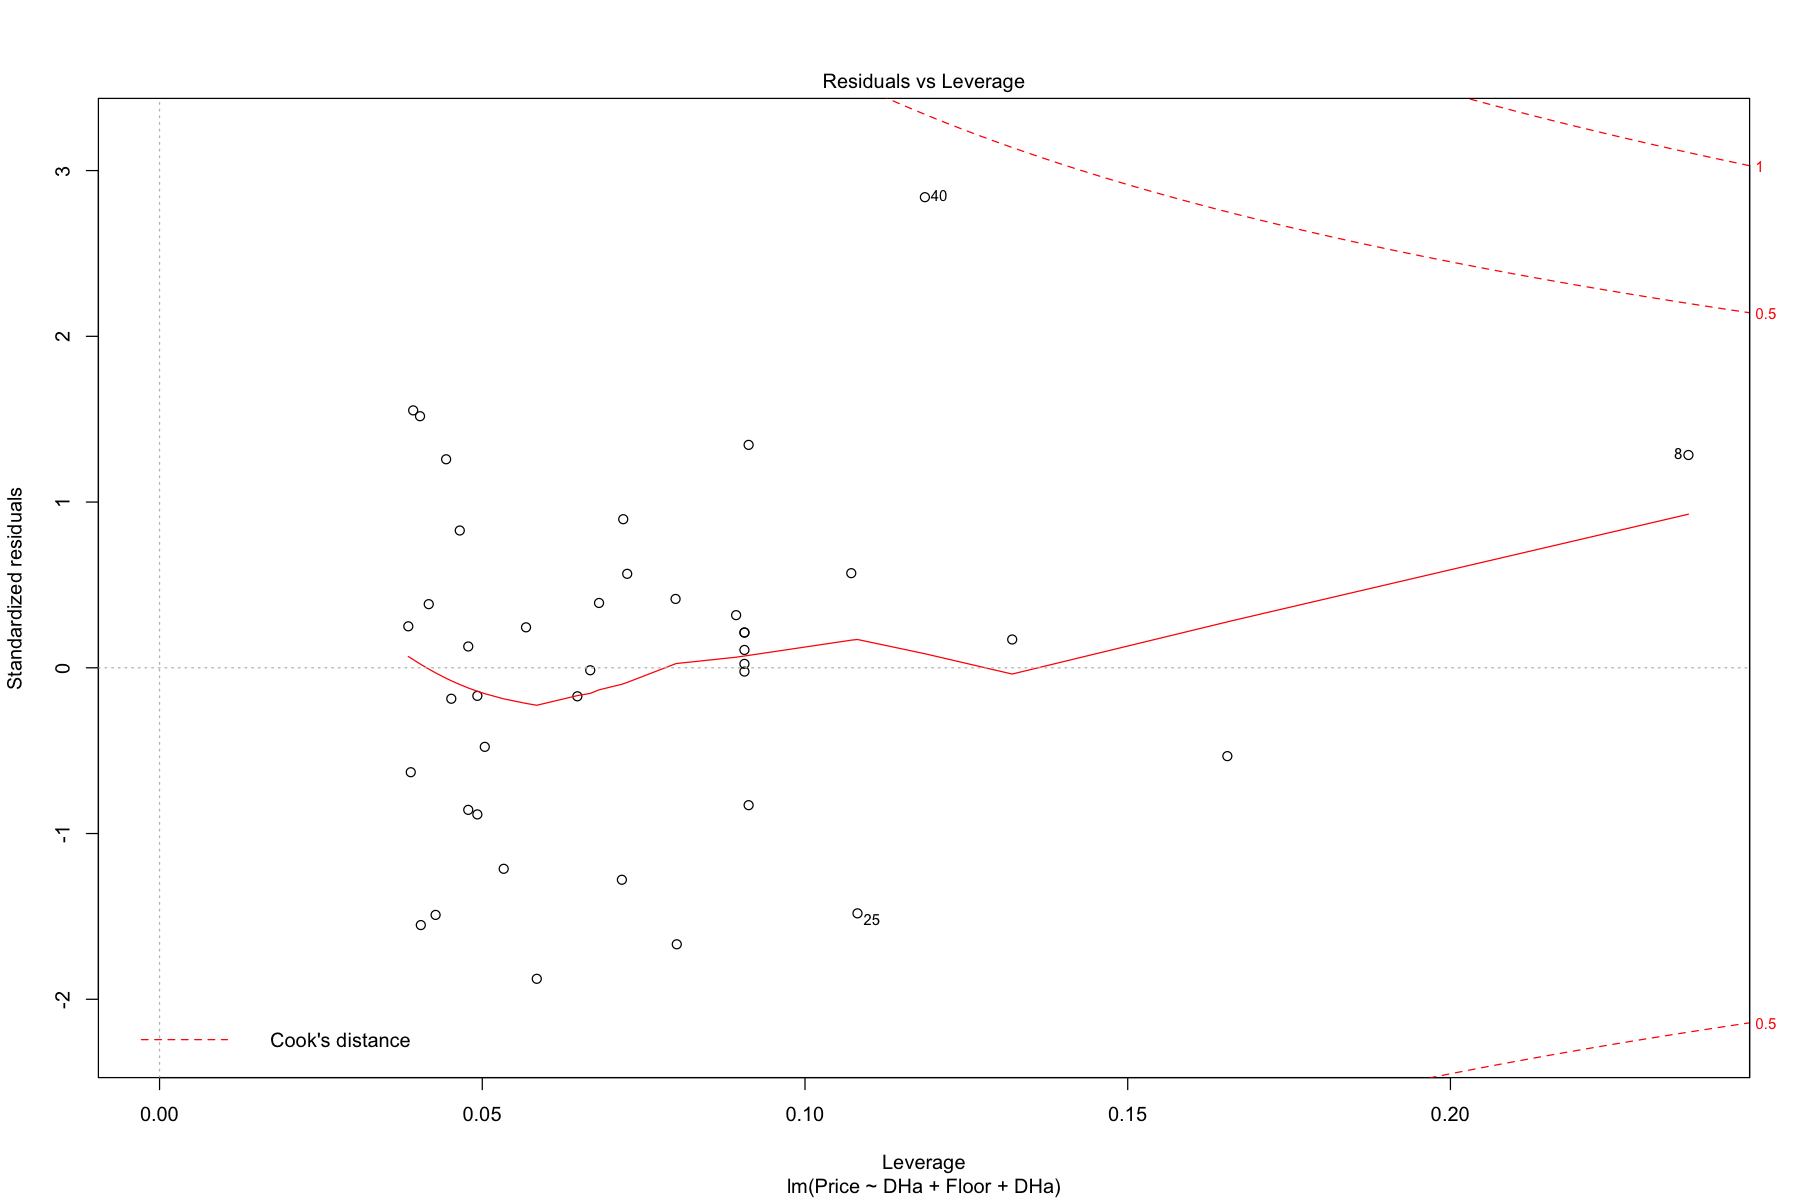

In [178]:
plot(lmHomes2)